# Setup do projeto

In [1]:
# Comandos para instalar cada biblioteca caso não esteja sendo usado um ambiente virtual com elas instaladas
# !pip install geopy
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install requests
# !pip install unicodedata
# !pip install matplotlib.pyplot
# !pip install kagglehub

In [2]:
#Importando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import requests
import unicodedata
import matplotlib.pyplot as plt
import geopy

In [3]:
#Importando arquivos da API do Kaggle

import kagglehub

path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

C:\Users\itall\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\itall\.cache\kagglehub\datasets\olistbr\brazilian-ecommerce\versions\2


In [4]:
#Lendo cada arquivo importado do Kaggle

customers = pd.read_csv(path+'/olist_customers_dataset.csv')
geolocation = pd.read_csv(path+'/olist_geolocation_dataset.csv')
order_items = pd.read_csv(path+'/olist_order_items_dataset.csv')
orders_payments = pd.read_csv(path+'/olist_order_payments_dataset.csv')
orders_reviews = pd.read_csv(path+'/olist_order_reviews_dataset.csv')
orders = pd.read_csv(path+'/olist_orders_dataset.csv')
products = pd.read_csv(path+'/olist_products_dataset.csv')
sellers = pd.read_csv(path+'/olist_sellers_dataset.csv')
category_name = pd.read_csv(path+'/product_category_name_translation.csv')

In [5]:
#Para simplificar o projeto, as funções de validacoes foram colocadas em arquivos separados como funções python

import Validations.validations as validations
import Validations.validate_customers as validate_customers
import Validations.validate_geolocation as validate_geolocation
import Validations.validate_order_items as validate_order_items
import Validations.validate_orders_payments as validate_orders_payments
import Validations.validate_orders_reviews as validate_orders_reviews
import Validations.validate_orders as validate_orders
import Validations.validate_orders_reviews as validate_orders_reviews
import Validations.validate_products as validate_products
import Validations.validate_sellers as validate_sellers

![Brazilian E-Commerce Public Dataset by Olist Data Schema](./Images/Brazilian_E-Commerce_Public_Dataset_by_Olist_Data_Schema.png)

As tabelas e seus relacionamentos estão em um padrão levemente direcionado ao Snow Flake. A estrutura não será alterada pois a velocidade de consulta não é tão relevante e como são poucos dados, mesmo no modelo SnowFlake não fica tão complexo

# Análise Inicial e Exploratória 

## Análise Inicial e Exploratória - Orders

In [6]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
registros_invalidos_orders = validate_orders.validate_orders(orders)

=====RESULTADOS PARA A COLUNA ORDER_ID=====
Linhas Válidas da Coluna order_id no dataframe: 99441 de 99441 (100.00%)
Linhas Inválidas da Coluna order_id no dataframe: 0 de 99441 (0.00%) 

=====RESULTADOS PARA A COLUNA CUSTOMER_ID=====
Linhas Válidas da Coluna customer_id no dataframe: 99441 de 99441 (100.00%)
Linhas Inválidas da Coluna customer_id no dataframe: 0 de 99441 (0.00%) 

=====RESULTADOS PARA A COLUNA ORDER_STATUS=====
Linhas Válidas da Coluna order_status no dataframe: 99441 de 99441 (100.00%)
Linhas Inválidas da Coluna order_status no dataframe: 0 de 99441 (0.00%) 

=====RESULTADOS PARA A COLUNA ORDER_PURCHASE_TIMESTAMP=====
Linhas Válidas da Coluna order_purchase_timestamp no dataframe: 99441 de 99441 (100.00%)
Linhas Inválidas da Coluna order_purchase_timestamp no dataframe: 0 de 99441 (0.00%) 

=====RESULTADOS PARA A COLUNA ORDER_APPROVED_AT=====
Linhas Válidas da Coluna order_approved_at no dataframe: 99281 de 99441 (99.84%)
Linhas Inválidas da Coluna order_approved_at 

Há três colunas com valores inválido:
*   order_approved_at;
*   order_delivered_carrier_date;
*   order_delivered_customer_date

A falta desses dados pode dever-se ao momento que as informações foram extraídas. Ou seja, quando o recorte dos pedidos foi tirado, alguns pedidos não foram enviados, outros não chegaram. Além disso, pedidos cancelados também não tem data de entrega por não terem sido entregues. Mesmo assim é possível ver que alguns pedidos têm alguma data inválida e estão com o status "entregue", mas são pouquissímos.

Levando em consideração que todos os registros com alguma data inválida são cerca de 3% da amostra e que não é a intenção analisar no momento taxa de cancelamento, pedidos em andamentos, entre outros, foi decidido retirar os registros com alguma data inválida. A exclusão será feita posteriormente, os dados das linhas inválidas serão guardados

## Análise Inicial e Exploratória - Orders Reviews

In [8]:
orders_reviews.info
orders_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Análise de colunas inválidas - Orders Reviews

In [9]:
registros_invalidos_orders_reviews = validate_orders_reviews.validate_orders_reviews(orders_reviews)

=====RESULTADOS PARA A COLUNA REVIEW_ID=====
Linhas Válidas da Coluna review_id no dataframe: 99224 de 99224 (100.00%)
Linhas Inválidas da Coluna review_id no dataframe: 0 de 99224 (0.00%) 

=====RESULTADOS PARA A COLUNA ORDER_ID=====
Linhas Válidas da Coluna order_id no dataframe: 99224 de 99224 (100.00%)
Linhas Inválidas da Coluna order_id no dataframe: 0 de 99224 (0.00%) 

=====RESULTADOS PARA A COLUNA REVIEW_SCORE=====
Linhas Válidas da Coluna review_score no dataframe: 99224 de 99224 (100.00%)
Linhas Inválidas da Coluna review_score no dataframe: 0 de 99224 (0.00%) 

=====RESULTADOS PARA A COLUNA REVIEW_CREATION_DATE=====
Linhas Válidas da Coluna review_creation_date no dataframe: 99224 de 99224 (100.00%)
Linhas Inválidas da Coluna review_creation_date no dataframe: 0 de 99224 (0.00%) 

=====RESULTADOS PARA A COLUNA REVIEW_ANSWER_TIMESTAMP=====
Linhas Válidas da Coluna review_answer_timestamp no dataframe: 99224 de 99224 (100.00%)
Linhas Inválidas da Coluna review_answer_timestamp

Não houveram valores inválidos para este dataset. Portanto, não há itens para serem retirados aqui




### Hipóteses - Orders Reviews

#### Hipótese 01: A data das colunas review_creation_date e review_answer_timestamp são sempre iguais

Olhando para os nomes das colunas e pelo senso comum, é possível intuir que a pessoa tenha feito o review e o comentário no mesmo momento

In [10]:
#Verifica se os dias apontados nas colunas review_answer_timestamp e review_creation_date são iguais
orders_reviews_datas_coincidem = orders_reviews.copy()

#Converte as colunas para o tipo datetime para poderem ser comparadas posteriormente por dt.date
orders_reviews_datas_coincidem['review_creation_date'] = pd.to_datetime(orders_reviews_datas_coincidem['review_creation_date'], errors='coerce')
orders_reviews_datas_coincidem['review_answer_timestamp'] = pd.to_datetime(orders_reviews_datas_coincidem['review_answer_timestamp'], errors='coerce')

#Compara as colunas com dt.date para saber se a apenas a data (e não data e horário) são iguais
orders_reviews_datas_coincidem['datas_coincidem'] = orders_reviews_datas_coincidem['review_creation_date'].dt.date == orders_reviews_datas_coincidem['review_answer_timestamp'].dt.date

#Soma a quantidade de dados que coincidem e não coincidem
contagem_datas_coincidem = orders_reviews_datas_coincidem['datas_coincidem'].sum()
contagem_datas_nao_coincidem = len(orders_reviews_datas_coincidem) - contagem_datas_coincidem

#Mostra resultado na tela
print(f"Nº de registros com review_creation_date e review_answer_timestamp iguais: {contagem_datas_coincidem} de {len(orders_reviews_datas_coincidem)} ({contagem_datas_coincidem/len(orders_reviews_datas_coincidem)*100:.2f}%)" )
print(f"Nº de registros com review_creation_date e review_answer_timestamp diferentes: {contagem_datas_nao_coincidem} de {len(orders_reviews_datas_coincidem)}({contagem_datas_nao_coincidem/len(orders_reviews_datas_coincidem)*100:.2f}%)")


Nº de registros com review_creation_date e review_answer_timestamp iguais: 24361 de 99224 (24.55%)
Nº de registros com review_creation_date e review_answer_timestamp diferentes: 74863 de 99224(75.45%)


**Resultado:** Hipótese inválida. Como visto no resultado, a maioria das reviews tiveram uma data de comentário e uma data review diferentes. Com isto surge a dúvida, por quê as datas são diferentes?

## Análise Inicial e Exploratória - Orders Payments

In [11]:
orders_payments.info()
orders_payments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Análise de colunas inválidas - Orders Payments


In [12]:
registros_invalidos_orders_payments = validate_orders_payments.validate_orders_payments(orders_payments)

=====RESULTADOS PARA A COLUNA ORDER_ID=====
Linhas Válidas da Coluna order_id no dataframe: 103886 de 103886 (100.00%)
Linhas Inválidas da Coluna order_id no dataframe: 0 de 103886 (0.00%) 

=====RESULTADOS PARA A COLUNA PAYMENT_TYPE=====
Linhas Válidas da Coluna payment_type no dataframe: 103886 de 103886 (100.00%)
Linhas Inválidas da Coluna payment_type no dataframe: 0 de 103886 (0.00%) 

=====RESULTADOS PARA A COLUNA PAYMENT_SEQUENTIAL=====
Linhas Válidas da Coluna payment_sequential no dataframe: 103886 de 103886 (100.00%)
Linhas Inválidas da Coluna payment_sequential no dataframe: 0 de 103886 (0.00%) 

=====RESULTADOS PARA A COLUNA PAYMENT_INSTALLMENTS=====
Linhas Válidas da Coluna payment_installments no dataframe: 103884 de 103886 (100.00%)
Linhas Inválidas da Coluna payment_installments no dataframe: 2 de 103886 (0.00%) 

=====RESULTADOS PARA A COLUNA PAYMENT_VALUE=====
Linhas Válidas da Coluna payment_value no dataframe: 103877 de 103886 (99.99%)
Linhas Inválidas da Coluna pay

## Análise de colunas inválidas - Orders Items

In [13]:
order_items.info()
order_items.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Análise de colunas inválidas - Order Items


In [14]:
registros_invalidos_order_items = validate_order_items.validate_order_items(order_items)

=====RESULTADOS PARA A COLUNA ORDER_ID=====
Linhas Válidas da Coluna order_id no dataframe: 112650 de 112650 (100.00%)
Linhas Inválidas da Coluna order_id no dataframe: 0 de 112650 (0.00%) 

=====RESULTADOS PARA A COLUNA PRODUCT_ID=====
Linhas Válidas da Coluna product_id no dataframe: 112650 de 112650 (100.00%)
Linhas Inválidas da Coluna product_id no dataframe: 0 de 112650 (0.00%) 

=====RESULTADOS PARA A COLUNA SELLER_ID=====
Linhas Válidas da Coluna seller_id no dataframe: 112650 de 112650 (100.00%)
Linhas Inválidas da Coluna seller_id no dataframe: 0 de 112650 (0.00%) 

=====RESULTADOS PARA A COLUNA SHIPPING_LIMIT_DATE=====
Linhas Válidas da Coluna shipping_limit_date no dataframe: 112650 de 112650 (100.00%)
Linhas Inválidas da Coluna shipping_limit_date no dataframe: 0 de 112650 (0.00%) 

=====RESULTADOS PARA A COLUNA PRICE=====
Linhas Válidas da Coluna price no dataframe: 112650 de 112650 (100.00%)
Linhas Inválidas da Coluna price no dataframe: 0 de 112650 (0.00%) 

=====RESULTA

## Análise Inicial e Exploratória - Products

### Análise de colunas inválidas - Products

In [15]:
registros_invalidos_products = validate_products.validate_products(products)

=====RESULTADOS PARA A COLUNA PRODUCT_ID=====
Linhas Válidas da Coluna product_id no dataframe: 32951 de 32951 (100.00%)
Linhas Inválidas da Coluna product_id no dataframe: 0 de 32951 (0.00%) 

=====RESULTADOS PARA A COLUNA PRODUCT_CATEGORY_NAME=====
Linhas Válidas da Coluna product_category_name no dataframe: 32341 de 32951 (98.15%)
Linhas Inválidas da Coluna product_category_name no dataframe: 610 de 32951 (1.85%) 

=====RESULTADOS PARA A COLUNA PRODUCT_NAME_LENGHT=====
Linhas Válidas da Coluna product_name_lenght no dataframe: 32341 de 32951 (98.15%)
Linhas Inválidas da Coluna product_name_lenght no dataframe: 610 de 32951 (1.85%) 

=====RESULTADOS PARA A COLUNA PRODUCT_DESCRIPTION_LENGHT=====
Linhas Válidas da Coluna product_description_lenght no dataframe: 32341 de 32951 (98.15%)
Linhas Inválidas da Coluna product_description_lenght no dataframe: 610 de 32951 (1.85%) 

=====RESULTADOS PARA A COLUNA PRODUCT_PHOTOS_QTY=====
Linhas Válidas da Coluna product_photos_qty no dataframe: 3

Há alguns produtos inválidos por não terem categoria e nome e produtos inválidos por não terem especificado características como peso, altura, etc. Como apenas a categoria importa para o tipo de análise que irá ser feita, apenas os itens com categorias inválidas fora classificados como inválidos

## Análise Inicial e Exploratória - Customers

In [16]:
sellers.info()
sellers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Análise de colunas inválidas - Seller

In [17]:
registros_invalidos_sellers = validate_sellers.validate_sellers(sellers)

=====RESULTADOS PARA A COLUNA SELLER_ID=====
Linhas Válidas da Coluna seller_id no dataframe: 3095 de 3095 (100.00%)
Linhas Inválidas da Coluna seller_id no dataframe: 0 de 3095 (0.00%) 

=====RESULTADOS PARA A COLUNA SELLER_CITY=====
Linhas Válidas da Coluna seller_city no dataframe: 3019 de 3095 (97.54%)
Linhas Inválidas da Coluna seller_city no dataframe: 76 de 3095 (2.46%) 

=====RESULTADOS PARA A COLUNA SELLER_STATE=====
Linhas Válidas da Coluna seller_state no dataframe: 3095 de 3095 (100.00%)
Linhas Inválidas da Coluna seller_state no dataframe: 0 de 3095 (0.00%) 



## Análise Inicial e Exploratória - Customers

In [18]:
customers.info()
customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Análise de colunas inválidas - Customers

In [19]:
registros_invalidos_customers = validate_customers.validate_customers(customers)

=====RESULTADOS PARA A COLUNA CUSTOMER_ID=====
Linhas Válidas da Coluna customer_id no dataframe: 99441 de 99441 (100.00%)
Linhas Inválidas da Coluna customer_id no dataframe: 0 de 99441 (0.00%) 

=====RESULTADOS PARA A COLUNA CUSTOMER_UNIQUE_ID=====
Linhas Válidas da Coluna customer_unique_id no dataframe: 99441 de 99441 (100.00%)
Linhas Inválidas da Coluna customer_unique_id no dataframe: 0 de 99441 (0.00%) 

=====RESULTADOS PARA A COLUNA CUSTOMER_CITY=====
Linhas Válidas da Coluna customer_city no dataframe: 98787 de 99441 (99.34%)
Linhas Inválidas da Coluna customer_city no dataframe: 654 de 99441 (0.66%) 

=====RESULTADOS PARA A COLUNA CUSTOMER_STATE=====
Linhas Válidas da Coluna customer_state no dataframe: 99441 de 99441 (100.00%)
Linhas Inválidas da Coluna customer_state no dataframe: 0 de 99441 (0.00%) 



## Análise Inicial e Exploratória - Geolocation

In [35]:
customers.info()
customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Análise de colunas inválidas - Geolocation

In [20]:
registros_invalidos_geolocation = validate_geolocation.validate_geolocation(geolocation)

=====RESULTADOS PARA A COLUNA GEOLOCATION_LAT=====
Linhas Válidas da Coluna geolocation_lat no dataframe: 1000163 de 1000163 (100.00%)
Linhas Inválidas da Coluna geolocation_lat no dataframe: 0 de 1000163 (0.00%) 

=====RESULTADOS PARA A COLUNA GEOLOCATION_LNG=====
Linhas Válidas da Coluna geolocation_lng no dataframe: 1000158 de 1000163 (100.00%)
Linhas Inválidas da Coluna geolocation_lng no dataframe: 5 de 1000163 (0.00%) 

=====RESULTADOS PARA A COLUNA GEOLOCATION_CITY=====
Linhas Válidas da Coluna geolocation_city no dataframe: 994655 de 1000163 (99.45%)
Linhas Inválidas da Coluna geolocation_city no dataframe: 5508 de 1000163 (0.55%) 

=====RESULTADOS PARA A COLUNA GEOLOCATION_STATE=====
Linhas Válidas da Coluna geolocation_state no dataframe: 1000163 de 1000163 (100.00%)
Linhas Inválidas da Coluna geolocation_state no dataframe: 0 de 1000163 (0.00%) 



# Respostas de Negócio

## Quantos pedidos foram entregues dentro do prazo em números absolutos e em porcentagem?


In [21]:
#Copying just the necessary data
orders_delivery_time = orders[['order_delivered_customer_date', 'order_estimated_delivery_date']].copy()

#Converting the columns to Datetime and extracting just the date in order_delivered_customer_date case
orders_delivery_time['order_delivered_customer_date'] = pd.to_datetime(orders_delivery_time['order_delivered_customer_date'], errors='coerce').dt.date
orders_delivery_time['order_estimated_delivery_date'] = pd.to_datetime(orders_delivery_time['order_estimated_delivery_date'], errors='coerce')

#Excluding invalid records
orders_delivery_time.dropna(subset=['order_delivered_customer_date', 'order_estimated_delivery_date'])

#Comparing the delivered date with estimeted delivery date
orders_delivery_time['delivered_on_date'] = orders_delivery_time['order_delivered_customer_date'] <= orders_delivery_time['order_estimated_delivery_date']

#Calculating results
orders_total_number = len(orders_delivery_time)
orders_deliverd_on_time = orders_delivery_time['delivered_on_date'].sum()
orders_deliverd_not_on_time = len(orders_delivery_time) - orders_delivery_time['delivered_on_date'].sum()
orders_deliverd_on_time_percentage = round(orders_deliverd_on_time / orders_total_number * 100, 2)
orders_deliverd_not_on_time_percentage = round(orders_deliverd_not_on_time / orders_total_number * 100, 2)

#Showing results
print(f'Total number of orders delivered on date: {orders_deliverd_on_time} of {orders_total_number} ({orders_deliverd_on_time_percentage}%) ')
print(f'Total number of orders not delivered on date: {orders_deliverd_not_on_time} of {orders_total_number} ({orders_deliverd_not_on_time_percentage}%) ')


Total number of orders delivered on date: 89941 of 99441 (90.45%) 
Total number of orders not delivered on date: 9500 of 99441 (9.55%) 


## Qual a distância média que um pedido se move em km por dia?

In [22]:
#Copying just the necessary data
orders_distance_per_day = orders[['order_id', 'customer_id', 'order_estimated_delivery_date', 'order_delivered_customer_date', 'order_delivered_carrier_date']].copy()

#Converting the columns to Datetime and extracting just the date in order_delivered_customer_date case
orders_distance_per_day['order_delivered_customer_date'] = pd.to_datetime(orders_distance_per_day['order_delivered_customer_date'], errors='coerce').dt.date
orders_delivery_time['order_estimated_delivery_date'] = pd.to_datetime(orders_delivery_time['order_estimated_delivery_date'], errors='coerce').dt.date
orders_distance_per_day['order_delivered_carrier_date'] = pd.to_datetime(orders_distance_per_day['order_delivered_carrier_date'], errors='coerce').dt.date

orders_distance_per_day.head()

,order_id,customer_id,order_estimated_delivery_date,order_delivered_customer_date,order_delivered_carrier_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-18 00:00:00,2017-10-10,2017-10-04
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-08-13 00:00:00,2018-08-07,2018-07-26
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-09-04 00:00:00,2018-08-17,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-12-15 00:00:00,2017-12-02,2017-11-22
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-26 00:00:00,2018-02-16,2018-02-14


In [23]:
orders_distance_per_day = pd.merge(order_items, orders_distance_per_day, on='order_id', how='left')
orders_distance_per_day = orders_distance_per_day[['order_id', 'seller_id', 'customer_id','order_estimated_delivery_date', 'order_delivered_customer_date', 'order_delivered_carrier_date']]
orders_distance_per_day.head()

,order_id,seller_id,customer_id,order_estimated_delivery_date,order_delivered_customer_date,order_delivered_carrier_date
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,2017-09-29 00:00:00,2017-09-20,2017-09-19
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,2017-05-15 00:00:00,2017-05-12,2017-05-04
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,2018-02-05 00:00:00,2018-01-22,2018-01-16
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,2018-08-20 00:00:00,2018-08-14,2018-08-10
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,2017-03-17 00:00:00,2017-03-01,2017-02-16


In [24]:
orders_distance_per_day = pd.merge(orders_distance_per_day, customers, on='customer_id', how='left')
orders_distance_per_day = orders_distance_per_day[['order_id', 'seller_id', 'customer_id', 'customer_city','order_estimated_delivery_date', 'order_delivered_customer_date', 'order_delivered_carrier_date']]
orders_distance_per_day.head()

,order_id,seller_id,customer_id,customer_city,order_estimated_delivery_date,order_delivered_customer_date,order_delivered_carrier_date
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,2017-09-29 00:00:00,2017-09-20,2017-09-19
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,santa fe do sul,2017-05-15 00:00:00,2017-05-12,2017-05-04
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,para de minas,2018-02-05 00:00:00,2018-01-22,2018-01-16
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,atibaia,2018-08-20 00:00:00,2018-08-14,2018-08-10
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,varzea paulista,2017-03-17 00:00:00,2017-03-01,2017-02-16


In [25]:
geolocation_merge = geolocation.drop_duplicates(subset=['geolocation_city'], keep='first').copy()

In [26]:
orders_distance_per_day = pd.merge(orders_distance_per_day, geolocation_merge, left_on='customer_city', right_on='geolocation_city', how='left')
orders_distance_per_day = orders_distance_per_day.rename(columns={
    'geolocation_lat': 'customer_geolocation_lat',
    'geolocation_lng': 'customer_geolocation_lng',
})
orders_distance_per_day = orders_distance_per_day[['order_id', 'seller_id', 'customer_id', 'customer_city','order_estimated_delivery_date', 'order_delivered_customer_date', 'order_delivered_carrier_date', 'customer_geolocation_lat', 'customer_geolocation_lng']]

orders_distance_per_day.head()

,order_id,seller_id,customer_id,customer_city,order_estimated_delivery_date,order_delivered_customer_date,order_delivered_carrier_date,customer_geolocation_lat,customer_geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,2017-09-29 00:00:00,2017-09-20,2017-09-19,-21.720140,-41.310453
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,santa fe do sul,2017-05-15 00:00:00,2017-05-12,2017-05-04,-20.212393,-50.941471
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,para de minas,2018-02-05 00:00:00,2018-01-22,2018-01-16,-19.847170,-44.601957
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,atibaia,2018-08-20 00:00:00,2018-08-14,2018-08-10,-23.112774,-46.548885
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,varzea paulista,2017-03-17 00:00:00,2017-03-01,2017-02-16,-23.184985,-46.825698


In [27]:
orders_distance_per_day = pd.merge(orders_distance_per_day, sellers, on='seller_id', how='left')
orders_distance_per_day = orders_distance_per_day[['order_id', 'seller_id', 'seller_city','customer_id', 'customer_city','order_estimated_delivery_date', 'order_delivered_customer_date', 'order_delivered_carrier_date', 'customer_geolocation_lat', 'customer_geolocation_lng']]

orders_distance_per_day.head()

,order_id,seller_id,seller_city,customer_id,customer_city,order_estimated_delivery_date,order_delivered_customer_date,order_delivered_carrier_date,customer_geolocation_lat,customer_geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,volta redonda,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,2017-09-29 00:00:00,2017-09-20,2017-09-19,-21.720140,-41.310453
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,sao paulo,f6dd3ec061db4e3987629fe6b26e5cce,santa fe do sul,2017-05-15 00:00:00,2017-05-12,2017-05-04,-20.212393,-50.941471
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,borda da mata,6489ae5e4333f3693df5ad4372dab6d3,para de minas,2018-02-05 00:00:00,2018-01-22,2018-01-16,-19.847170,-44.601957
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,franca,d4eb9395c8c0431ee92fce09860c5a06,atibaia,2018-08-20 00:00:00,2018-08-14,2018-08-10,-23.112774,-46.548885
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,loanda,58dbd0b2d70206bf40e62cd34e84d795,varzea paulista,2017-03-17 00:00:00,2017-03-01,2017-02-16,-23.184985,-46.825698


In [28]:
orders_distance_per_day = pd.merge(orders_distance_per_day, geolocation_merge, left_on='seller_city', right_on='geolocation_city', how='left')
orders_distance_per_day = orders_distance_per_day.rename(columns={
    'geolocation_lat': 'seller_geolocation_lat',
    'geolocation_lng': 'seller_geolocation_lng',
})
orders_distance_per_day = orders_distance_per_day[['order_id', 'seller_id', 'customer_id', 'customer_city','order_estimated_delivery_date', 'order_delivered_customer_date', 'order_delivered_carrier_date', 'customer_geolocation_lat', 'customer_geolocation_lng', 'seller_geolocation_lat', 'seller_geolocation_lng']]

orders_distance_per_day.head()

,order_id,seller_id,customer_id,customer_city,order_estimated_delivery_date,order_delivered_customer_date,order_delivered_carrier_date,customer_geolocation_lat,customer_geolocation_lng,seller_geolocation_lat,seller_geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,2017-09-29 00:00:00,2017-09-20,2017-09-19,-21.720140,-41.310453,-22.529850,-44.124115
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,santa fe do sul,2017-05-15 00:00:00,2017-05-12,2017-05-04,-20.212393,-50.941471,-23.545621,-46.639292
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,para de minas,2018-02-05 00:00:00,2018-01-22,2018-01-16,-19.847170,-44.601957,-22.264094,-46.158564
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,atibaia,2018-08-20 00:00:00,2018-08-14,2018-08-10,-23.112774,-46.548885,-20.531935,-47.399447
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,varzea paulista,2017-03-17 00:00:00,2017-03-01,2017-02-16,-23.184985,-46.825698,-22.931427,-53.133759


In [29]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic

def calcular_distancia(row):
    try:
        coords_cliente = (row['customer_geolocation_lat'], row['customer_geolocation_lng'])
        coords_vendedor = (row['seller_geolocation_lat'], row['seller_geolocation_lng'])

        distancia = geodesic(coords_cliente, coords_vendedor).kilometers
        return distancia
    except (ValueError, TypeError):
        return np.nan

orders_distance_per_day['distance_km'] = orders_distance_per_day.apply(calcular_distancia, axis=1)


In [30]:
orders_distance_per_day = orders_distance_per_day[['order_id', 'seller_id', 'customer_id','order_estimated_delivery_date', 'order_delivered_customer_date', 'order_delivered_carrier_date', 'distance_km']]
orders_distance_per_day.head()

,order_id,seller_id,customer_id,order_estimated_delivery_date,order_delivered_customer_date,order_delivered_carrier_date,distance_km
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,2017-09-29 00:00:00,2017-09-20,2017-09-19,303.813291
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,2017-05-15 00:00:00,2017-05-12,2017-05-04,577.773431
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,2018-02-05 00:00:00,2018-01-22,2018-01-16,312.690412
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,2018-08-20 00:00:00,2018-08-14,2018-08-10,298.992802
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,2017-03-17 00:00:00,2017-03-01,2017-02-16,646.999551


In [31]:
orders_distance_per_day['delivery_in_days'] = (orders_distance_per_day['order_delivered_customer_date'] - orders_distance_per_day['order_delivered_carrier_date'])
orders_distance_per_day['delivery_in_days'] = pd.to_timedelta(orders_distance_per_day['delivery_in_days']).dt.days
orders_distance_per_day.head()

,order_id,seller_id,customer_id,order_estimated_delivery_date,order_delivered_customer_date,order_delivered_carrier_date,distance_km,delivery_in_days
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,2017-09-29 00:00:00,2017-09-20,2017-09-19,303.813291,1.0
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,2017-05-15 00:00:00,2017-05-12,2017-05-04,577.773431,8.0
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,2018-02-05 00:00:00,2018-01-22,2018-01-16,312.690412,6.0
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,2018-08-20 00:00:00,2018-08-14,2018-08-10,298.992802,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,2017-03-17 00:00:00,2017-03-01,2017-02-16,646.999551,13.0


In [32]:
orders_distance_per_day['average_distance_in_days'] = (orders_distance_per_day['distance_km']/orders_distance_per_day['delivery_in_days'])
orders_distance_per_day.head()

,order_id,seller_id,customer_id,order_estimated_delivery_date,order_delivered_customer_date,order_delivered_carrier_date,distance_km,delivery_in_days,average_distance_in_days
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,2017-09-29 00:00:00,2017-09-20,2017-09-19,303.813291,1.0,303.813291
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,2017-05-15 00:00:00,2017-05-12,2017-05-04,577.773431,8.0,72.221679
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,2018-02-05 00:00:00,2018-01-22,2018-01-16,312.690412,6.0,52.115069
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,2018-08-20 00:00:00,2018-08-14,2018-08-10,298.992802,4.0,74.748200
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,2017-03-17 00:00:00,2017-03-01,2017-02-16,646.999551,13.0,49.769196


In [33]:
orders_distance_per_day['difference_days_estimed_delivered_date'] = pd.to_datetime(orders_distance_per_day['order_estimated_delivery_date']) - pd.to_datetime(orders_distance_per_day['order_delivered_carrier_date'])
orders_distance_per_day

,order_id,seller_id,customer_id,order_estimated_delivery_date,order_delivered_customer_date,order_delivered_carrier_date,distance_km,delivery_in_days,average_distance_in_days,difference_days_estimed_delivered_date
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,2017-09-29 00:00:00,2017-09-20,2017-09-19,303.813291,1.0,303.813291,10 days
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,2017-05-15 00:00:00,2017-05-12,2017-05-04,577.773431,8.0,72.221679,11 days
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,2018-02-05 00:00:00,2018-01-22,2018-01-16,312.690412,6.0,52.115069,20 days
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,2018-08-20 00:00:00,2018-08-14,2018-08-10,298.992802,4.0,74.748200,10 days
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,2017-03-17 00:00:00,2017-03-01,2017-02-16,646.999551,13.0,49.769196,29 days
...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,b8bc237ba3788b23da09c0f1f3a3288c,b51593916b4b8e0d6f66f2ae24f2673d,2018-05-18 00:00:00,2018-05-10,2018-04-25,2737.196264,15.0,182.479751,23 days
112646,fffcd46ef2263f404302a634eb57f7eb,f3c38ab652836d21de61fb8314b69182,84c5d4fbaf120aae381fad077416eaa0,2018-08-01 00:00:00,2018-07-23,2018-07-17,339.003763,6.0,56.500627,15 days
112647,fffce4705a9662cd70adb13d4a31832d,c3cfdc648177fdbbbb35635a37472c53,29309aa813182aaddc9b259e31b870e6,2017-11-10 00:00:00,2017-10-28,2017-10-26,339.003763,2.0,169.501881,15 days
112648,fffe18544ffabc95dfada21779c9644f,2b3e4a2a3ea8e01938cabda2a3e5cc79,b5e6afd5a41800fdf401e0272ca74655,2017-08-25 00:00:00,2017-08-16,2017-08-15,68.984116,1.0,68.984116,10 days


In [34]:
orders_distance_per_day['order_estimated_delivery_date'] = pd.to_datetime(
    orders_distance_per_day['order_estimated_delivery_date']
)

dias_a_reduzir = pd.to_timedelta(
    orders_distance_per_day['delivery_in_days'] * 2,
    unit='D')

days_to_reduce_from_estimative = (orders_distance_per_day['difference_days_estimed_delivered_date'] - dias_a_reduzir)


orders_distance_per_day['days_to_reduce_from_estimative'] = np.where(
    days_to_reduce_from_estimative > pd.Timedelta(days=0),  
    days_to_reduce_from_estimative.dt.days, 
    np.nan
)

orders_distance_per_day.head()

,order_id,seller_id,customer_id,order_estimated_delivery_date,order_delivered_customer_date,order_delivered_carrier_date,distance_km,delivery_in_days,average_distance_in_days,difference_days_estimed_delivered_date,days_to_reduce_from_estimative
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,2017-09-29,2017-09-20,2017-09-19,303.813291,1.0,303.813291,10 days,8.0
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,2017-05-15,2017-05-12,2017-05-04,577.773431,8.0,72.221679,11 days,NaN
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,2018-02-05,2018-01-22,2018-01-16,312.690412,6.0,52.115069,20 days,8.0
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,2018-08-20,2018-08-14,2018-08-10,298.992802,4.0,74.748200,10 days,2.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,2017-03-17,2017-03-01,2017-02-16,646.999551,13.0,49.769196,29 days,3.0


## Existe uma relação entre atraso/adiantamento de um pedido e a satisfação do cliente em relação há aquele pedido?

In [41]:
orders_reviews.head()
orders_reviews_with_score = orders_reviews[['order_id', 'review_score']].copy()
orders_reviews_with_score.head()

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [42]:
orders_difference_days_estimed_deliverd_date = orders_distance_per_day[['order_id', 'difference_days_estimed_delivered_date']]
orders_difference_days_estimed_deliverd_date.head()

,order_id,difference_days_estimed_delivered_date
0,00010242fe8c5a6d1ba2dd792cb16214,10 days
1,00018f77f2f0320c557190d7a144bdd3,11 days
2,000229ec398224ef6ca0657da4fc703e,20 days
3,00024acbcdf0a6daa1e931b038114c75,10 days
4,00042b26cf59d7ce69dfabb4e55b4fd9,29 days


In [ ]:
orders_relation_score_delivered_date = pd.merge(orders_difference_days_estimed_deliverd_date, orders_reviews_with_score, how='inner')
orders_relation_score_delivered_date['difference_in_days'] = orders_relation_score_delivered_date['difference_days_estimed_delivered_date'].dt.days
orders_relation_score_delivered_date.head()

,order_id,difference_days_estimed_delivered_date,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,10.0,5
1,00018f77f2f0320c557190d7a144bdd3,11.0,4
2,000229ec398224ef6ca0657da4fc703e,20.0,5
3,00024acbcdf0a6daa1e931b038114c75,10.0,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,29.0,5


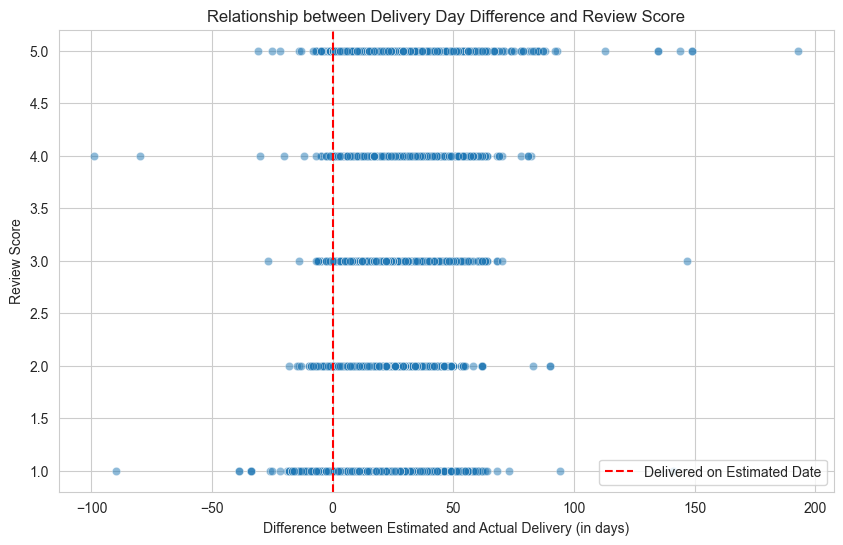

In [ ]:
# Set the plot style
sns.set_style("whitegrid")

# Create the figure and axes for the plot, defining a size
plt.figure(figsize=(10, 6))

# Create the scatter plot
# 'alpha=0.5' adds some transparency to help visualize overlapping points
sns.scatterplot(
    data=orders_relation_score_delivered_date,
    x='difference_days_estimed_delivered_date',
    y='review_score',
    alpha=0.5
)

# Add titles and labels for clarity
plt.title('Relationship between Delivery Day Difference and Review Score')
plt.xlabel('Difference between Estimated and Actual Delivery (in days)')
plt.ylabel('Review Score')

# Add a vertical line at x=0 to mark the point where the delivery was on time
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.5, label='Delivered on Estimated Date')
plt.legend()

# Show the plot
plt.show()

## Outras Características como preço, parcelamento entre outros pode interferir na satisfação do cliente? 


In [56]:
orders_payments_unique_order_id = orders_payments[orders_payments['payment_sequential'] == 1]
orders_payments_unique_order_id.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [57]:
orders_relation_score_delivered_date_payments = pd.merge(orders_payments_unique_order_id, orders_relation_score_delivered_date, on='order_id', how='right')
orders_relation_score_delivered_date_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,difference_days_estimed_delivered_date,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,credit_card,2.0,72.19,10.0,5
1,00018f77f2f0320c557190d7a144bdd3,1.0,credit_card,3.0,259.83,11.0,4
2,000229ec398224ef6ca0657da4fc703e,1.0,credit_card,5.0,216.87,20.0,5
3,00024acbcdf0a6daa1e931b038114c75,1.0,credit_card,2.0,25.78,10.0,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,credit_card,3.0,218.04,29.0,5


In [58]:
orders_relation_score_delivered_date_payments = orders_relation_score_delivered_date_payments[['order_id', 'payment_installments', 'payment_value', 'difference_days_estimed_delivered_date', 'review_score']]
orders_relation_score_delivered_date_payments.head()

,order_id,payment_installments,payment_value,difference_days_estimed_delivered_date,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,2.0,72.19,10.0,5
1,00018f77f2f0320c557190d7a144bdd3,3.0,259.83,11.0,4
2,000229ec398224ef6ca0657da4fc703e,5.0,216.87,20.0,5
3,00024acbcdf0a6daa1e931b038114c75,2.0,25.78,10.0,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,3.0,218.04,29.0,5


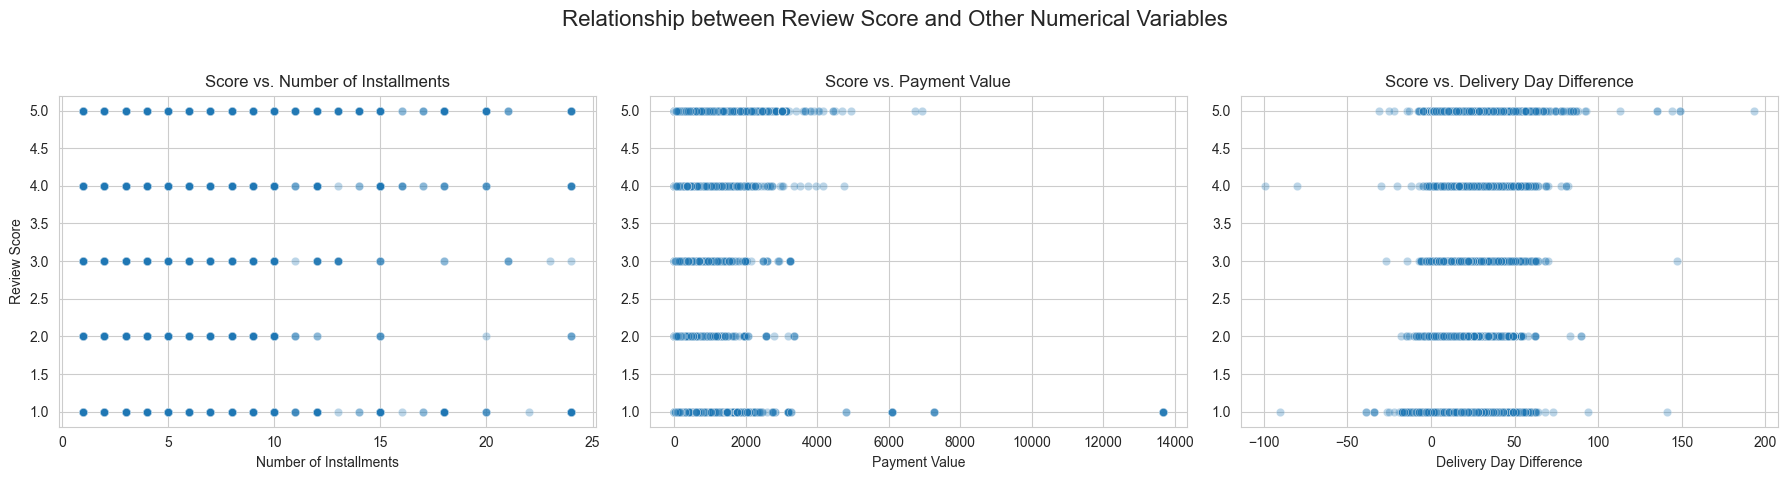

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the general style for the plots
sns.set_style("whitegrid")

# Create a figure and a set of subplots (1 row, 3 columns)
# figsize=(18, 5) creates a wide figure to comfortably fit the 3 plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Add a general title for the entire figure
fig.suptitle('Relationship between Review Score and Other Numerical Variables', fontsize=16)

# --- Plot 1: Review Score vs. Number of Installments ---
sns.scatterplot(
    ax=axes[0],  # Tells seaborn to draw on the first subplot
    data=orders_relation_score_delivered_date_payments, # Use the new DataFrame name
    x='payment_installments',
    y='review_score',
    alpha=0.3  # Adds transparency to see point density
)
axes[0].set_title('Score vs. Number of Installments')
axes[0].set_xlabel('Number of Installments')
axes[0].set_ylabel('Review Score')

# --- Plot 2: Review Score vs. Payment Value ---
sns.scatterplot(
    ax=axes[1],  # Draw on the second subplot
    data=orders_relation_score_delivered_date_payments, # Use the new DataFrame name
    x='payment_value',
    y='review_score',
    alpha=0.3
)
axes[1].set_title('Score vs. Payment Value')
axes[1].set_xlabel('Payment Value')
axes[1].set_ylabel('')  # Remove the Y-label to declutter the view

# --- Plot 3: Review Score vs. Delivery Day Difference ---
sns.scatterplot(
    ax=axes[2],  # Draw on the third subplot
    data=orders_relation_score_delivered_date_payments, # Use the new DataFrame name
    x='difference_days_estimed_delivered_date',
    y='review_score',
    alpha=0.3
)
axes[2].set_title('Score vs. Delivery Day Difference')
axes[2].set_xlabel('Delivery Day Difference')
axes[2].set_ylabel('')  # Remove the Y-label

# Adjust the layout to prevent titles from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust to make space for the suptitle

# Show the figure with all the plots
plt.show()

##